<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 1850) (1288,)


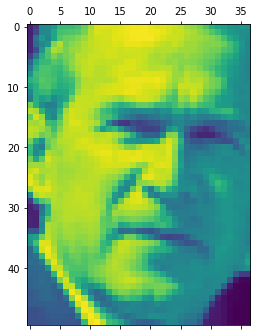

In [ ]:
import numpy as np
import sklearn.neural_network as NN

from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

print(lfw_people.target_names)
data = lfw_people.data
target = lfw_people.target
print(data.shape,target.shape)
# Ejemplo para graficar
import matplotlib.pyplot as plt
plt.matshow(lfw_people.images[456])
plt.show()

In [ ]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(data)

PCA(n_components=1000, svd_solver='randomized')

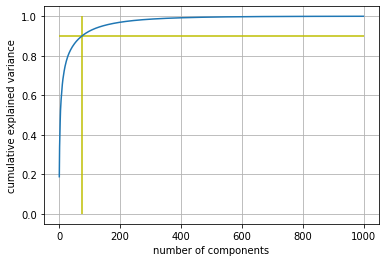

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(75,0.,1.,colors='y')
plt.hlines(0.9,0.,1000.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

Graficando la varianza de manera acumulativa, se puede observar aproximadamente cuantas componentes son necesarias para alcanzar el 90# de la varianza. En un aproximado, se puede decir que a partir de 100 componentes cumplimos con el requerimiento por lo que se fija un valor de Q=150, un valor superior al 90% de la varianza por lo que se garantiza que se trabajará con un aproximado excelente y que a su vez disminuirá la capacidad computacional que se puede ejecutar si se ejercutara sin aplicar PCA al dataset.



In [ ]:
pca = PCA(n_components = 150,svd_solver='randomized').fit(data)
Xfaces = data
components = pca.transform(data)
Xtrain, Xtest, ytrain, ytest = train_test_split(components,target,test_size=0.3)

#SVM

C = 0.001 	Acc = 0.43669250645994834


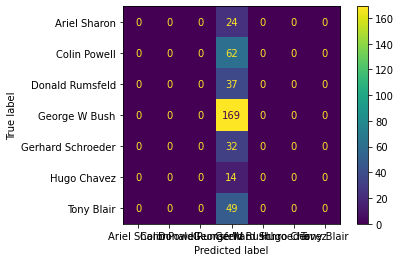

C = 1 	Acc = 0.7390180878552972


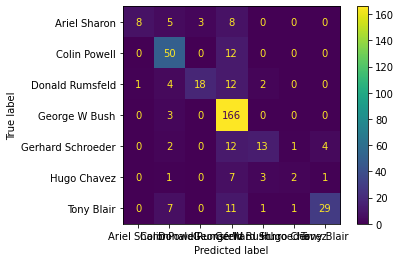

C = 5 	Acc = 0.8087855297157622


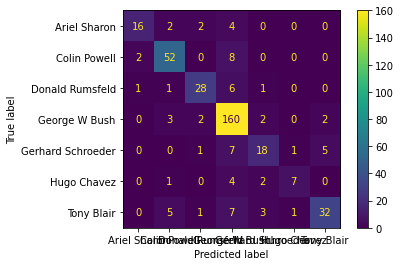

C = 10 	Acc = 0.8087855297157622


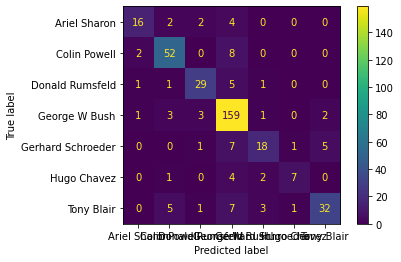

C = 100 	Acc = 0.8087855297157622


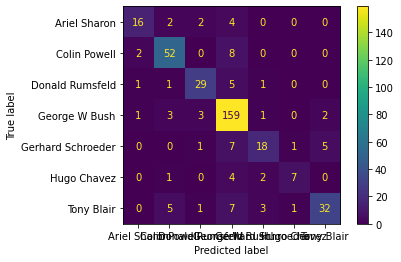

In [ ]:
C = [1e-3, 1 , 5, 10, 100]

for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'rbf')
  model.fit(Xtrain,ytrain)

  yPred = model.predict(Xtest)
  CMAT = confusion_matrix(ytest,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
  print("C =",c,"\tAcc =",porcentajeAcierto)

  ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
  ax.plot()
  plt.show()



Para cada una de las matrices de confusion con parametro de regularización C>5,se logra observar que el porcentaje de acierto no mejora notablemente, lo que es un indicativo de no mejora y que no es necesario aumentar su valor (Aumentado su calculo computacional) dado que no habrán cambios considerables.

<function matplotlib.pyplot.show(*args, **kw)>

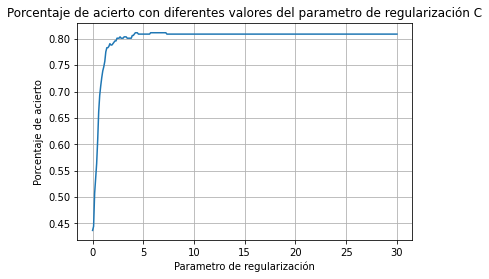

In [ ]:
C = np.linspace(5e-3,30,300)
acc_vector = []
for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'rbf')
  model.fit(Xtrain,ytrain)

  yPred = model.predict(Xtest)
  CMAT = confusion_matrix(ytest,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
  acc_vector.append(porcentajeAcierto)

plt.plot(C,acc_vector)
plt.xlabel("Parametro de regularización")
plt.ylabel("Porcentaje de acierto")
plt.title("Porcentaje de acierto con diferentes valores del parametro de regularización C")
plt.grid()
plt.show

Se puede corroborar lo dicho anteriormente,que aunque aumentaramos el valor del parametro de regularización C no se iba a tener mejora en el porcentaje de acierto. Se puede ver que aproximadamente para C=5 ya se mantiene ese porcentaje.

C= 0.001 	degree= 1 	Acc= 0.8113695090439277


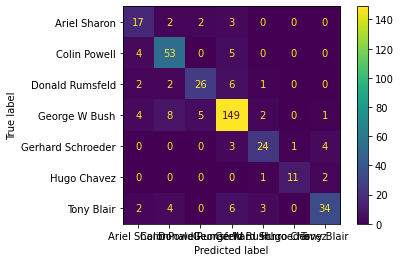

C= 0.001 	degree= 2 	Acc= 0.6770025839793282


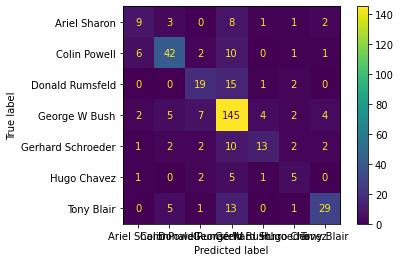

C= 0.001 	degree= 3 	Acc= 0.7028423772609819


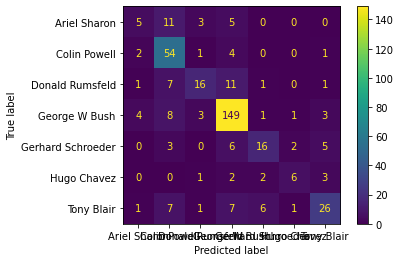

C= 1 	degree= 1 	Acc= 0.813953488372093


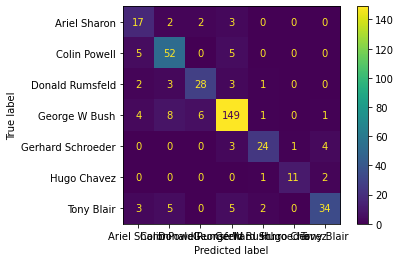

C= 1 	degree= 2 	Acc= 0.6770025839793282


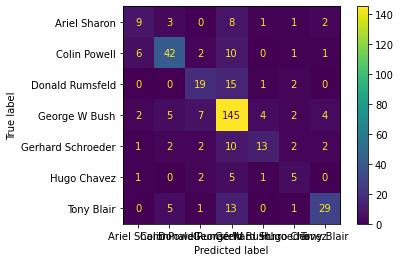

C= 1 	degree= 3 	Acc= 0.7028423772609819


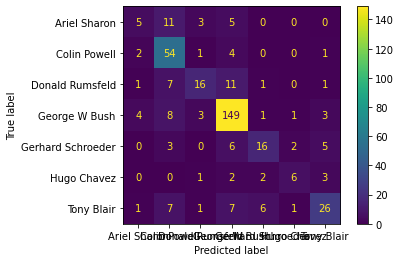

C= 10 	degree= 1 	Acc= 0.813953488372093


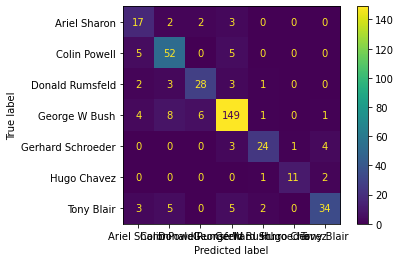

C= 10 	degree= 2 	Acc= 0.6770025839793282


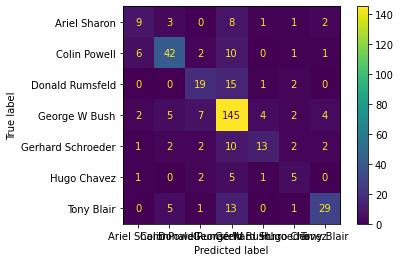

C= 10 	degree= 3 	Acc= 0.7028423772609819


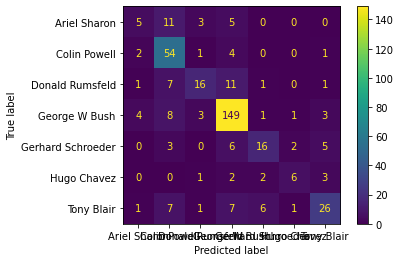

C= 100 	degree= 1 	Acc= 0.813953488372093


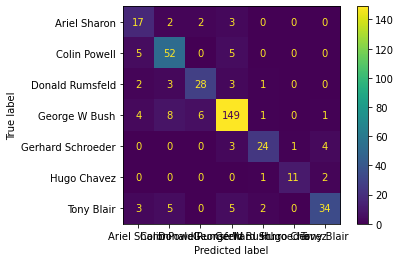

C= 100 	degree= 2 	Acc= 0.6770025839793282


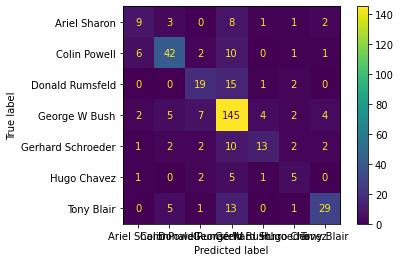

C= 100 	degree= 3 	Acc= 0.7028423772609819


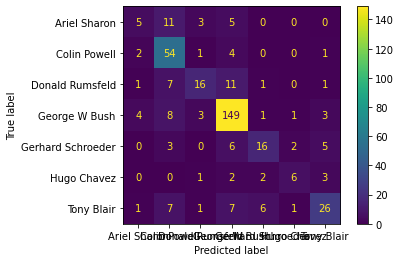

In [ ]:
C = [1e-3, 1 , 10, 100]
degree = [1, 2, 3]

for c in C:
  for deg in degree:
    model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = deg)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("C=",c,"\tdegree=",deg,"\tAcc=",porcentajeAcierto)

    ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
    ax.plot()
    plt.show()

\begin{array}{ccc}
&&Grado&\\
C&1&2&3\\
1e-3&0.785&0.658&0.648\\
1&0.767&0.658&0.648\\
10&0.767&0.658&0.648\\
100&0.767&0.658&0.648\\
\end{array}

En la tabla resumen anterior, se puede observar que los porcentajes de acierto se mantienen iguales para diferentes valores de C y con diferentes grados del polinomio para el Kernel, dando que para un polinomio de grado 1 es con el que se obtiene mejores resultados.

C= 0.001 	degree= 1 	Acc= 0.8113695090439277


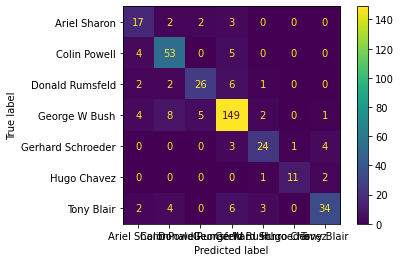

C= 0.001 	degree= 2 	Acc= 0.6770025839793282


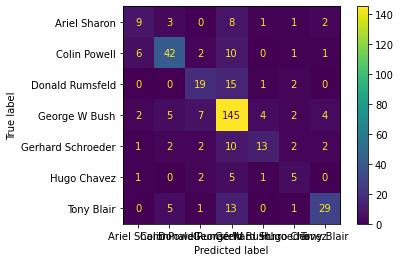

C= 0.001 	degree= 3 	Acc= 0.7028423772609819


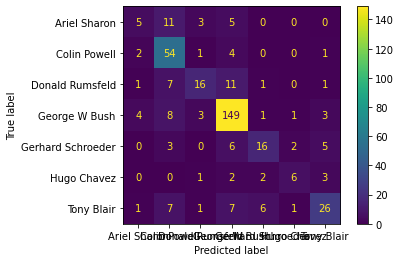

C= 1 	degree= 1 	Acc= 0.813953488372093


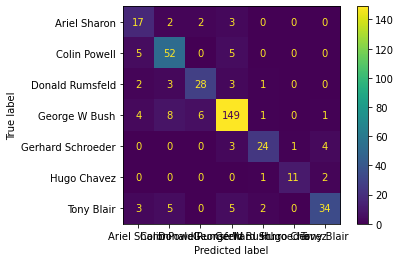

C= 1 	degree= 2 	Acc= 0.6770025839793282


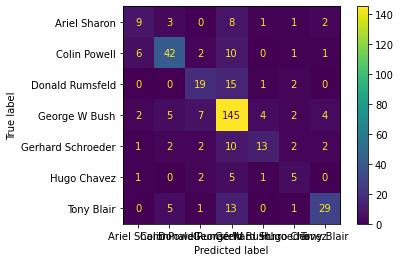

C= 1 	degree= 3 	Acc= 0.7028423772609819


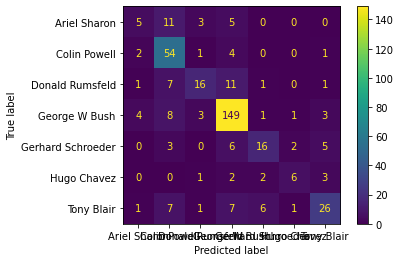

C= 10 	degree= 1 	Acc= 0.813953488372093


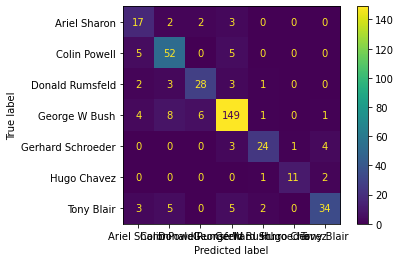

C= 10 	degree= 2 	Acc= 0.6770025839793282


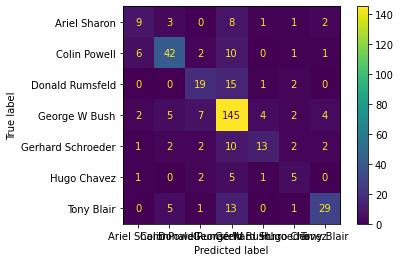

C= 10 	degree= 3 	Acc= 0.7028423772609819


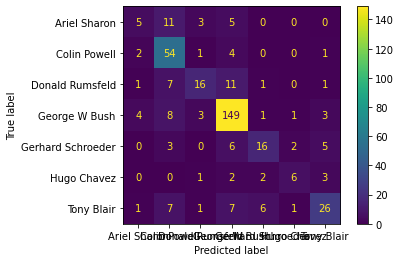

C= 100 	degree= 1 	Acc= 0.813953488372093


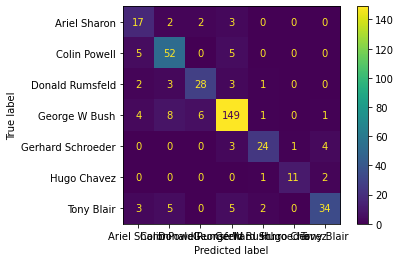

C= 100 	degree= 2 	Acc= 0.6770025839793282


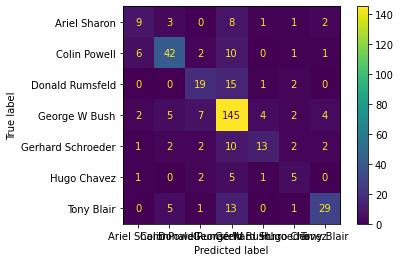

C= 100 	degree= 3 	Acc= 0.7028423772609819


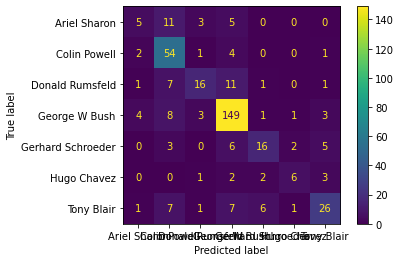

In [ ]:
C = [1e-3, 1 , 10, 100]
degree = [1, 2, 3]

for c in C:
  for deg in degree:
    model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = deg)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("C=",c,"\tdegree=",deg,"\tAcc=",porcentajeAcierto)

    ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
    ax.plot()
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

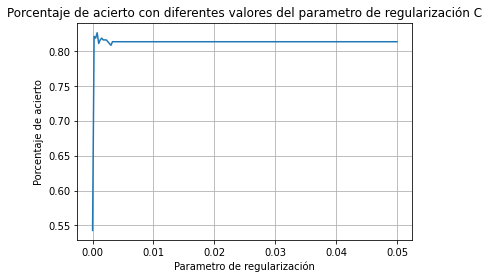

In [ ]:
C = np.linspace(1e-5,5e-2,200)
acc_vector = []
for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = 1)
  model.fit(Xtrain,ytrain)

  yPred = model.predict(Xtest)
  CMAT = confusion_matrix(ytest,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
  acc_vector.append(porcentajeAcierto)

plt.plot(C,acc_vector)
plt.xlabel("Parametro de regularización")
plt.ylabel("Porcentaje de acierto")
plt.title("Porcentaje de acierto con diferentes valores del parametro de regularización C")
plt.grid()
plt.show

Fijando el polinomio en grado 1, se observa como el porcentaje de acierto se fija rapidamente,aunque los valores de C son mostrados en un tramo pequeño se logró observar que aunque ampliando ese valor por lo menos a C=100,ese porcentaje de acierto no cambiaba.

0.7751937984496124


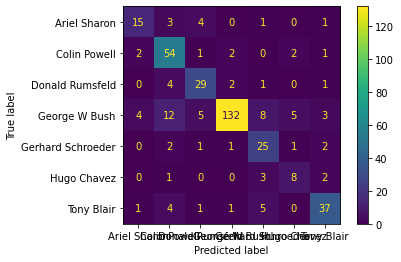

In [ ]:
# Entrenemos nuestro modelo
model = svm.LinearSVC(C = 1e-5, max_iter=3000)
model.fit(Xtrain,ytrain)

yPred = model.predict(Xtest)
CMAT = confusion_matrix(ytest,yPred)
porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
print(porcentajeAcierto)

ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
ax.plot()
plt.show()

# MLP Classifier

Acc: 0.5943152454780362


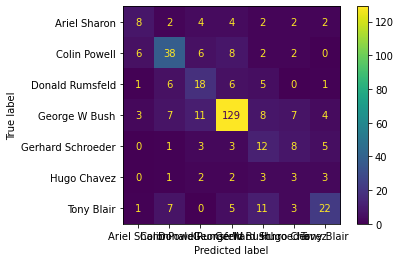

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(40), alpha=1e-4, solver='adam')
model.fit(Xtrain,ytrain)

yPred = model.predict(Xtest)
CMAT = confusion_matrix(ytest,yPred)
porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
print("Acc:",porcentajeAcierto)

ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
ax.plot()
plt.show()

In [ ]:
layers = [(40),(20,20),(20,10,10),(10,20,10),(10,10,20),(10,10,10,10)]
solv = ['adam','sgd','lbfgs']
for sol in solv:
  print("With solver:",sol)
  for lay in layers:
    model = MLPClassifier(hidden_layer_sizes=lay, solver=sol, max_iter=1000, alpha=1e-4)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("Porcentaje de acierto layer",lay,":",porcentajeAcierto)



With solver: adam
Porcentaje de acierto layer 40 : 0.5917312661498708
Porcentaje de acierto layer (20, 20) : 0.49612403100775193
Porcentaje de acierto layer (20, 10, 10) : 0.4496124031007752
Porcentaje de acierto layer (10, 20, 10) : 0.4186046511627907
Porcentaje de acierto layer (10, 10, 20) : 0.4496124031007752
Porcentaje de acierto layer (10, 10, 10, 10) : 0.3772609819121447
With solver: sgd
Porcentaje de acierto layer 40 : 0.7829457364341085
Porcentaje de acierto layer (20, 20) : 0.524547803617571
Porcentaje de acierto layer (20, 10, 10) : 0.43410852713178294
Porcentaje de acierto layer (10, 20, 10) : 0.4935400516795866
Porcentaje de acierto layer (10, 10, 20) : 0.49612403100775193
Porcentaje de acierto layer (10, 10, 10, 10) : 0.3772609819121447
With solver: lbfgs
Porcentaje de acierto layer 40 : 0.7131782945736435
Porcentaje de acierto layer (20, 20) : 0.6382428940568475
Porcentaje de acierto layer (20, 10, 10) : 0.5658914728682171


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Porcentaje de acierto layer (10, 20, 10) : 0.5322997416020672


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Porcentaje de acierto layer (10, 10, 20) : 0.6124031007751938
Porcentaje de acierto layer (10, 10, 10, 10) : 0.6434108527131783


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Se trabajó con 40 neuronas distribuidas en diferente capas.En general, se observó que cuando las neuronas estaban juntas en una sola capa, el algoritmo tuvo mejor desempeño que cuando se empezarón a distribuir en mas capas.Ademas, se obtuvo mejores resultados en los porcentajes de acierto cuando el solver fue **lbfgs**.

In [ ]:
layers = [(30),(20,10),(10,20),(10,10,10)]
solv = ['adam','sgd','lbfgs']
for sol in solv:
  print("With solver:",sol)
  for lay in layers:
    model = MLPClassifier(hidden_layer_sizes=lay, solver=sol, max_iter=1000, alpha=1e-4)
    model.fit(Xtrain,ytrain)

    yPred = model.predict(Xtest)
    CMAT = confusion_matrix(ytest,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(ytest)
    print("Porcentaje de acierto layer",lay,":",porcentajeAcierto)

With solver: adam
Porcentaje de acierto layer 30 : 0.6098191214470284
Porcentaje de acierto layer (20, 10) : 0.5142118863049095
Porcentaje de acierto layer (10, 20) : 0.5219638242894057
Porcentaje de acierto layer (10, 10, 10) : 0.37467700258397935
With solver: sgd
Porcentaje de acierto layer 30 : 0.7596899224806202
Porcentaje de acierto layer (20, 10) : 0.6046511627906976
Porcentaje de acierto layer (10, 20) : 0.5658914728682171
Porcentaje de acierto layer (10, 10, 10) : 0.5064599483204134
With solver: lbfgs
Porcentaje de acierto layer 30 : 0.7312661498708011
Porcentaje de acierto layer (20, 10) : 0.6744186046511628
Porcentaje de acierto layer (10, 20) : 0.6201550387596899
Porcentaje de acierto layer (10, 10, 10) : 0.5839793281653747


Cuando se disminuyerón el numero de neuronas en total a 30 y las diferentes distribuciones entre diferentes capas se obtuvo un comportamiento similar,en donde el porcentaje de acierto fue mejor cuando estaban todas juntas y el solver mejor siguió siendo el **lbfgs**.

#Enfoque clasico de Deep Learning

In [ ]:
import tensorflow as tf

Xtrain, Xtest, ytrain, ytest = train_test_split(data,target,test_size=0.3)

Xtrain = Xtrain.astype('float32') / 255
Xtest = Xtest.astype('float32') / 255

In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(Xtrain, Xvalid) = Xtrain[51:], Xtrain[:51] 
(ytrain, yvalid) = ytrain[51:], ytrain[:51]
print(Xtrain.shape)

(850, 1850)


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)

h = 1850
Xtrain = Xtrain.reshape(Xtrain.shape[0],h, 1)
Xvalid = Xvalid.reshape(Xvalid.shape[0],h, 1)
Xtest = Xtest.reshape(Xtest.shape[0],h, 1)

# One-hot encode the labels
ytrain = tf.keras.utils.to_categorical(ytrain, 7)
yvalid = tf.keras.utils.to_categorical(yvalid, 7)
ytest = tf.keras.utils.to_categorical(ytest, 7)

In [ ]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(1850,1))) 
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1850, 64)          192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 925, 64)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 925, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 925, 32)           4128      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 462, 32)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 462, 32)           0

In [ ]:
model.compile(loss='categorical_crossentropy', # Para multiclase siempre se recomienda inicialmente
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(Xtrain,
         ytrain,
         batch_size=128,
         epochs=10,
         validation_data=(Xvalid, yvalid),
         callbacks=[checkpointer])

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 2.0203 - accuracy: 0.2718
Epoch 1: val_loss improved from inf to 1.69850, saving model to model.weights.best.hdf5
7/7 [==============================] - 3s 357ms/step - loss: 2.0203 - accuracy: 0.2718 - val_loss: 1.6985 - val_accuracy: 0.4510
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 1.7556 - accuracy: 0.3953
Epoch 2: val_loss improved from 1.69850 to 1.67448, saving model to model.weights.best.hdf5
7/7 [==============================] - 2s 321ms/step - loss: 1.7556 - accuracy: 0.3953 - val_loss: 1.6745 - val_accuracy: 0.4510
Epoch 3/10
7/7 [==============================] - ETA: 0s - loss: 1.7150 - accuracy: 0.3953
Epoch 3: val_loss improved from 1.67448 to 1.65118, saving model to model.weights.best.hdf5
7/7 [==============================] - 3s 414ms/step - loss: 1.7150 - accuracy: 0.3953 - val_loss: 1.6512 - val_accuracy: 0.4510
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss:

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
# Evaluate the model on test set
score = model.evaluate(Xtest, ytest, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
testEtq = model.predict(Xtest[:2,:])


 Test accuracy: 0.475452184677124
